# TP: Machine Learning (SIA_3611)

## TP1: Linear Regression (4h) 

by Clément Bouvier 

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [96]:
a = 3
b = 4
c = a + b

In [97]:
c = c

In [98]:
print(c)

7


In [99]:
c

7

**QUESTION 1**

**What is triggering the output display?** Appeler la variable en dernière ligne de cellule ou utiliser une fonction d'affichage (print par exemple )

**TO DO 1.2**

Execute the following cells

In [100]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [101]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
aggregateTestResults          | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
completion                    | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
get-pip                       | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
install_debugpy               | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
interpreterInfo               | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
normalizeForInterpreter       | /Users/yohanismael/.vscode/extensions/ms-toolsai.jupyter-2022.9.1202862440/pythonFiles
normalizeSelection            | 

**QUESTION 2**

**What is displayed on the last output?** Les modules disponibles et leur chemin d'accès

**Which is the used Python version?** C'est la version 3.9

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

**Are these packages installed in this environment?** Yes

**TO DO 1.3**

Execute the following cell

In [102]:
pandas.__version__

NameError: name 'pandas' is not defined

**QUESTION 3**

**How would you solve this error?** Il faut importer pandas

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

**QUESTION 4**

**Can you explain the different elements printed on the last output?** df.info() fait un résumé du DataFrame en donnant le nom des colonnes, le type de leur contenu et du nombre de valeur non null.

In [104]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Longitude  Latitude Continent  Year      Status  Life_expectancy  \
931  France  -2.761729  42.17344    Europe  2014  Developing             82.2   
932  France  -2.761729  42.17344    Europe  2013  Developing             82.0   
933  France  -2.761729  42.17344    Europe  2012  Developing             81.5   
934  France  -2.761729  42.17344    Europe  2011  Developing             81.7   

     Adult_mortality  Infant_deaths  Alcohol  ...  Polio  Total_expenditure  \
931             79.0              3     11.5  ...   98.0              11.54   
932             81.0              3     11.1  ...   99.0              11.56   
933             83.0              3     11.5  ...   99.0              11.44   
934             83.0              3     11.8  ...   99.0              11.33   

     Diphtheria  HIV_AIDS          GDP  Population  Thinness _1-19_years  \
931        98.0       0.1  42955.24287  66331957.0                   0.6   
932        99.0       0.1  42554.12250  

**QUESTION 5**

**How do you interpret the new Data Frame df1 compared to df?** df1 est la restriction de df en prenant seulement les lignes avec comme pays la France et comme année au dessus de 2010
**What represents df2 compared to df1?** df2 correspond seulement aux années où les données sont présentes pour la France

**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [105]:
dfB=df[(df.Country == "Belgium") & (df.Year >= 2004) & (df.Year <= 2008)]
print( "The life expectancy in belgium between 2004 and 2008 is between",dfB.Life_expectancy.min(),"and",dfB.Life_expectancy.max())

The life expectancy in belgium between 2004 and 2008 is between 78.8 and 79.5


**TO DO 2.3**

Compute the correlation among all features

In [106]:
print(df.corr())

                                 Longitude  Latitude      Year  \
Longitude                         1.000000  0.064602 -0.018635   
Latitude                          0.064602  1.000000 -0.027252   
Year                             -0.018635 -0.027252  1.000000   
Life_expectancy                  -0.192675  0.432515  0.050771   
Adult_mortality                   0.091557 -0.348847 -0.037092   
Infant_deaths                     0.140981 -0.002955  0.008029   
Alcohol                          -0.202308  0.349825 -0.113365   
Percentage_expenditure           -0.057579  0.214447  0.069553   
Hepatitis_B                       0.012114  0.060178  0.114897   
Measles                           0.168937  0.033374 -0.053822   
BMI                              -0.233330  0.268139  0.005739   
Under-five_deaths                 0.134130 -0.011890  0.010479   
Polio                            -0.002238  0.179645 -0.016699   
Total_expenditure                -0.200847  0.043328  0.059493   
Diphtheria

**QUESTION 6**

**Which seems the most and the least promising values to use as a predictor for life expectancy?** The best seems to be Shooling and the least seems to be Population

The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

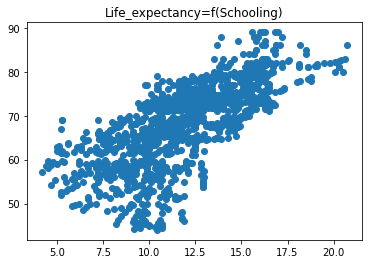

In [107]:
plt.scatter(df["Schooling"],df["Life_expectancy"])
plt.title("Life_expectancy=f(Schooling)")
plt.show()

## STEP 3: Simple Linear Regression

In [108]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [109]:
df_study=df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
df_study=df_study[["Life_expectancy","Income_composition_of_resources"]]
df_study

,Life_expectancy,Income_composition_of_resources
225,72.0,0.796
226,71.7,0.796
227,71.9,0.793
228,72.0,0.787
229,73.0,0.780
230,70.0,0.771
231,70.0,0.755
232,69.8,0.739
233,68.9,0.723
234,68.1,0.713


**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.

In [110]:

def SimpleLeastSquare(x,y):
    n=np.linspace(np.min(x),np.max(x),100)
    mean_x=np.sum(x)/np.size(x)
    mean_y=np.sum(y)/np.size(y)
    xmm=x-mean_x
    ymm=y-mean_y
    b1=(np.sum(xmm*ymm)) / (np.sum(xmm*xmm))
    b0=mean_y-b1*mean_x
    yn=b1*n+b0
    print(b0,b1)
    return(n,yn)
    

In [111]:
x=df_study["Income_composition_of_resources"].values
y=df_study["Life_expectancy"].values
(x_linspace,y_predict_linspace)=(SimpleLeastSquare(x,y))


49.34763518833232 28.5982261406769


**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corres-
ponding to df_study

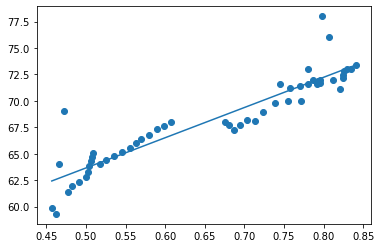

In [112]:
plt.plot(x_linspace,y_predict_linspace)
plt.scatter(x,y)
plt.show()

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, theta, alpha, iters)` where `x` are
the covariates, `y` the target value, `theta` the initial weights, `alpha` the learning rate and `iters` the number
of gradient descent iterations. Your function should return all intermediary values of `theta` that has been computed as a list.

In [113]:
def gradDescent(x, y, theta, alpha, iters):
    Lw = [(theta[0], theta[1])]
    a = 0
    b = 0 
    for k in range(iters):
        jwb0= 0
        jwb1= 0
        for i in range(len(y)):
            jwb0 += -2*(y[i]-Lw[k][0]-Lw[k][1]*x[i])
            jwb1 += -2*x[i]*(y[i]-Lw[k][0]-Lw[k][1]*x[i])
        jwb0=jwb0/len(y)
        jwb1=jwb1/len(y)

        a = Lw[k][0] - alpha*jwb0
        b = Lw[k][1] - alpha*jwb1
        Lw.append((a,b))
    return Lw


**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [114]:
List002 = gradDescent(df_study["Income_composition_of_resources"].values,df_study["Life_expectancy"].values, [0,1], 0.002, 1000)
List01 = gradDescent(df_study["Income_composition_of_resources"].values,df_study["Life_expectancy"].values, [0,1], 0.01, 1000)
List1 = gradDescent(df_study["Income_composition_of_resources"].values,df_study["Life_expectancy"].values, [0,1], 0.1, 1000)
List2 = gradDescent(df_study["Income_composition_of_resources"].values,df_study["Life_expectancy"].values, [0,1], 0.2, 1000)

**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

In [115]:
Lb0_002=[]
Lb1_002=[]
for i in List002:
    Lb0_002.append(i[0])
    Lb1_002.append(i[1])

Lb0_01=[]
Lb1_01=[]
for i in List01:
    Lb0_01.append(i[0])
    Lb1_01.append(i[1])

Lb0_1=[]
Lb1_1=[]
for i in List1:
    Lb0_1.append(i[0])
    Lb1_1.append(i[1])

Lb0_2=[]
Lb1_2=[]
for i in List2:
    Lb0_2.append(i[0])
    Lb1_2.append(i[1])


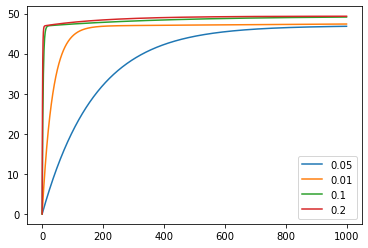

In [116]:
plt.plot(range(len(List002)),Lb0_002)
plt.plot(range(len(List01)),Lb0_01)
plt.plot(range(len(List1)),Lb0_1)
plt.plot(range(len(List2)),Lb0_2)
plt.legend(["0.05","0.01","0.1","0.2"])
plt.show()

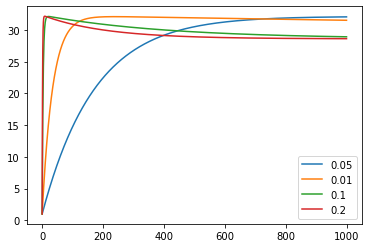

In [117]:
plt.plot(range(len(List002)),Lb1_002)
plt.plot(range(len(List01)),Lb1_01)
plt.plot(range(len(List1)),Lb1_1)
plt.plot(range(len(List2)),Lb1_2)
plt.legend(["0.05","0.01","0.1","0.2"])
plt.show()

**Question 7**

**Discuss on the role of alpha**

Alpha va permettre de conrôler la vitesse à laquelle les poids convergent vers leur valeur optimales

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [118]:
from sklearn.metrics import r2_score

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

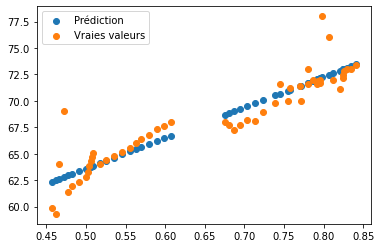

0.8465227575976074

In [119]:
b=List1[-1]
y_predict=[]
for i in range(x.size):
    y_predict.append(b[0]+x[i]*b[1])
y_predict
plt.scatter(x,y_predict)
plt.scatter(x,y)
plt.legend(["Prédiction","Vraies valeurs"])
plt.show()
r2_score(y,y_predict)

**QUESTION 8**

**Is linear regression suited between the two selected variables?** $R^2=0.84$ proche de 1, c'est un assez bonne prédcition

**QUESTION 9**

**If not, what would be the relevant regression between these two variables?** order 3 polynomial may be better

## STEP 4: Multivariate regression

**TO DO 4.1**

Execute the following cells

In [120]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

alphas = 10**np.linspace(10,-2,100)*0.5

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduc

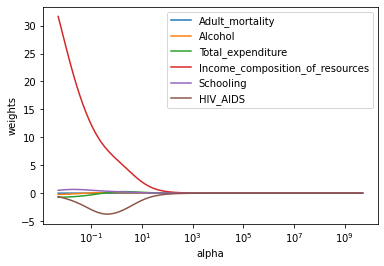

In [121]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(list(ridge.coef_))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.show()

**QUESTION 10**

**How do you interpret the plot?** 
Le terme alpha est un terme de pondération des grandes valeurs de poids qui définit l'importance de la minimisation du modèle calculé. Ainsi, lorsqu'il augmente, l'importance du modèle diminue, par conséquent les poids tendent vers 0.

**QUESTION 11**

**Is it normal that the l2 diminishes with alpha increasing?** Oui car c'est la norme 2 des poids. Or les poids tendent vers 0 lorsque alpha augmente donc la norme 2 du vecteur poids diminue.

**QUESTION 12**

**Which is the most relevant variable for Ridge? Prove and justify your response in the following cell.** The weight of Income composition of resources is the highest and the correlation between Life expectancy and Income composition of resources is the highest too ( for life expectancy) so the most relevant variable is Income composition of resources

In [122]:
df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS",'Life_expectancy']].corr()["Life_expectancy"]

Adult_mortality                   -0.263012
Alcohol                            0.840457
Total_expenditure                  0.643388
Income_composition_of_resources    0.920126
Schooling                          0.913310
HIV_AIDS                          -0.819865
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

**TO DO 4.2**

Execute the following cell

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To

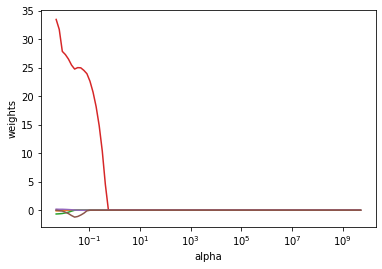

In [123]:
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

**QUESTION 13**

**Which is the most relevant variable for Lasso? Prove and justify your response in the following cell.** same as the last question -> Income composition of resources

**QUESTION 14**

**What is the main difference between Ridge and Lasso regression? For this setup, which is the prefered method to use? Justify your response** La décroissance des poids en fonction de alpha est plus rapide avec Lasso qu'avec Ridge. Lasso utilise un terme en norme 1 des poids pour minimiser les poids tandis que Ridge utilise un terme en norme 2 des poids. Les coefficients peuvent atteindre 0 avec Lasso. Ainsi Lasso peut annuler certains coefficient et non Ridge, cela signifie que pour des variables fortement corrélées, il est préférable d'utiliser Ridge pour ne pas que des coefficients importants s'annulent et décorrèlent les variables. Ainsi nous devons utiliser Ridge dans notre cas.

** TO CODE 4.3 **

Following the previous examples, use a sklearn function to compute a multivariable least square method. Compare the coefficients obtained by the different methods.

[ 2.65943031e-03 -3.17928713e-01 -7.99041602e-01  4.49600718e+01
  1.33103670e-01  1.25430166e-02] 43.28154551372652


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.8794497128525169

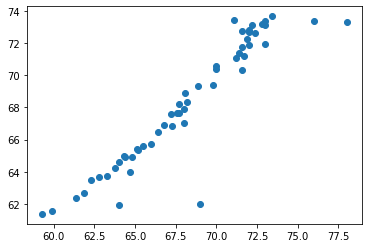

In [124]:
import sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X,y)
print(model.coef_,model.intercept_)
plt.scatter(y,model.predict(X))
r2_score(y,model.predict(X))


**TO CODE 4.4 **

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn. 

In [126]:
from sklearn.feature_selection import f_regression
regression=f_regression(X,y)
list(regression[0])

[3.864442141527443,
 125.09281253190987,
 36.729420299951016,
 287.05437637776515,
 261.50896011400374,
 106.62272299833975]

**QUESTION 15**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.

Income_composition_of_resources -> Schooling -> Alcohol -> HIV_AIDS -> Total_expenditure -> Adult_mortality

In [127]:
df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS",'Life_expectancy']].corr()["Life_expectancy"]

Adult_mortality                   -0.263012
Alcohol                            0.840457
Total_expenditure                  0.643388
Income_composition_of_resources    0.920126
Schooling                          0.913310
HIV_AIDS                          -0.819865
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

f_test is ranking the variables just like we do with the correlation of the subset